# Applying our model to RET analysis

## Imports

In [1]:
import sys
import os
import numpy as np
from scipy.integrate import solve_ivp
from scipy.stats import linregress
from openpyxl import load_workbook
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from droplet_impact import utils as ut, config as cfg

In [2]:
# Obtenir le répertoire courant
current_dir = os.path.dirname(os.path.abspath('RETanalysis.ipynb'))

# Construire le chemin vers le fichier Excel
data_dir = os.path.join(current_dir, '..', 'data', 'inputs')
fichier_excel = os.path.join(data_dir, 'data_bech_2020.xlsx')

# Utiliser pandas pour lire le fichier Excel
data = load_workbook(filename=fichier_excel,data_only=True)

## Time / Impact velocity

### Original data

In [3]:
d_350 = data['New Vestas G20 120L']
x_data_350, y_data_350 = ut.extract_data(d_350, 'Q7:Q37', 'T7:T37')
slope_350, intercept_350, r_value_350, p_value_350, std_err_350 = ut.linear_regression(np.log(x_data_350), y_data_350)

d_238 = data['New Vestas G27 60L']
x_data_238, y_data_238 = ut.extract_data(d_238, 'Q7:Q49', 'T7:T49')
slope_238, intercept_238, r_value_238, p_value_238, std_err_238 = ut.linear_regression(np.log(x_data_238), y_data_238)

d_190 = data['New Vestas G30 85L']
x_data_190, y_data_190 = ut.extract_data(d_190, 'Q7:Q47', 'T7:T47')
slope_190, intercept_190, r_value_190, p_value_190, std_err_190 = ut.linear_regression(np.log(x_data_190), y_data_190)

d_076 = data['New Vestas G27 105L']
x_data_076, y_data_076 = ut.extract_data(d_076, 'Q7:Q57', 'T7:T57')
slope_076, intercept_076, r_value_076, p_value_076, std_err_076 = ut.linear_regression(np.log(x_data_076), y_data_076)

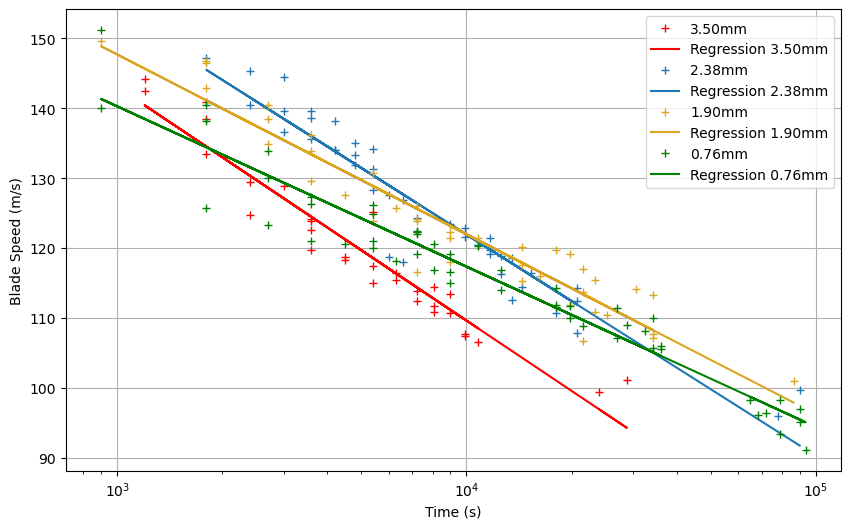

R^2 3.50mm: 0.9275421508874244
R^2 2.38mm: 0.9206474848325126
R^2 1.90mm: 0.9166882638705858
R^2 0.76mm: 0.9340250721132899


In [4]:
plt.figure(figsize=(10, 6))
plt.plot(x_data_350, y_data_350, '+', label='3.50mm', color = 'red')
plt.plot(x_data_350, slope_350*np.log(x_data_350) + intercept_350, color = 'red', label='Regression 3.50mm')
plt.plot(x_data_238, y_data_238, '+', label='2.38mm', color = 'tab:blue')
plt.plot(x_data_238, slope_238*np.log(x_data_238) + intercept_238, color = 'tab:blue', label='Regression 2.38mm')
plt.plot(x_data_190, y_data_190, '+', label='1.90mm', color = 'goldenrod')
plt.plot(x_data_190, slope_190*np.log(x_data_190) + intercept_190, color = 'goldenrod', label='Regression 1.90mm')
plt.plot(x_data_076, y_data_076, '+', label='0.76mm', color = 'green')
plt.plot(x_data_076, slope_076*np.log(x_data_076) + intercept_076, color = 'green', label='Regression 0.76mm')
plt.xscale('log')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Blade Speed (m/s)')
plt.show()

print('R^2 3.50mm:', r_value_350**2)
print('R^2 2.38mm:', r_value_238**2)
print('R^2 1.90mm:', r_value_190**2)
print('R^2 0.76mm:', r_value_076**2)

### Adjustment with our model

-------------------------
Corrected speeds:
3.50mm: [0.59776026 0.55791142 0.55519518 0.62001267 0.60820385 0.5613828
 0.54715549 0.62040965 0.57728398 0.49522015 0.53334454 0.50351725
 0.50550343 0.54808678 0.54339465 0.4796026  0.50471066 0.56383216
 0.5478727  0.49428471 0.51637345 0.50982981 0.48216081 0.47713476
 0.54383632 0.48166041 0.52798764 0.46725811 0.53849309 0.46901879
 0.43967827]
2.38mm: [0.43443636 0.45041042 0.6499291  0.67078948 0.62969434 0.66124287
 0.67090316 0.67501738 0.62719962 0.55053772 0.55506933 0.61405336
 0.71383304 0.6562022  0.71552844 0.64248829 0.63417829 0.60875923
 0.50622935 0.66190574 0.6739492  0.61532019 0.64746463 0.60102721
 0.6408311  0.61045847 0.60076139 0.53236264 0.56884727 0.62111717
 0.61231801 0.61068579 0.58719765 0.56245848 0.50923161 0.50034524
 0.57054074 0.58684568 0.55839572 0.61930784 0.54459889 0.53822668
 0.58910418]
1.90mm: [0.49092549 0.64133789 0.5848737  0.51185486 0.5713332  0.55010943
 0.53155846 0.53206724 0.60679855 0.

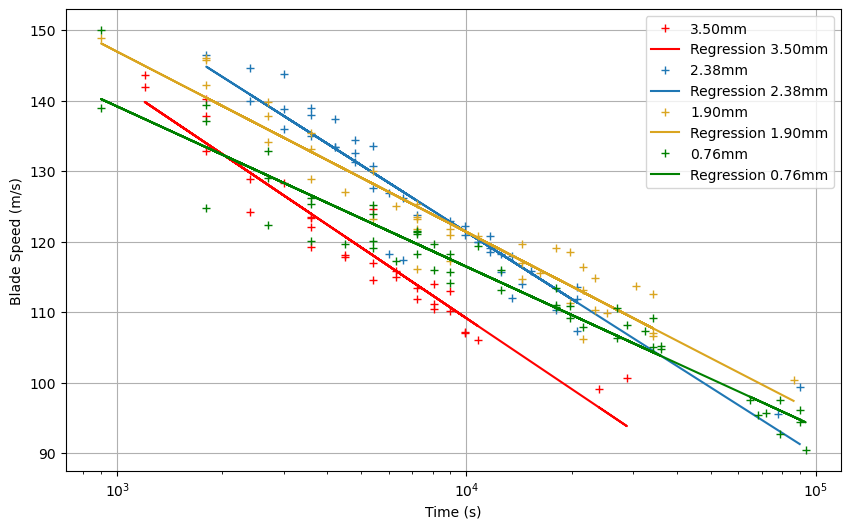

R^2 3.50mm: 0.9275421508874244
R^2 2.38mm: 0.9206474848325126
R^2 1.90mm: 0.9166882638705858
R^2 0.76mm: 0.9340250721132899


In [6]:
y_350_corrected = ut.corrected_speed(x= x_data_350, vv= y_data_350, diameter= 3.50e-3, nose_radius= 0.004455, n=1.1)
y_238_corrected = ut.corrected_speed(x= x_data_238, vv= y_data_238, diameter= 2.38e-3, nose_radius= 0.004455, n=1.1)
y_190_corrected = ut.corrected_speed(x= x_data_190, vv= y_data_190, diameter= 1.90e-3, nose_radius= 0.004455, n=1.1)
y_076_corrected = ut.corrected_speed(x= x_data_076, vv= y_data_076, diameter= 0.76e-3, nose_radius= 0.004455, n=1.1)

print('-------------------------')
print('Corrected speeds:')
print('3.50mm:', y_data_350-y_350_corrected)
print('2.38mm:', y_data_238-y_238_corrected)
print('1.90mm:', y_data_190-y_190_corrected)
print('0.76mm:', y_data_076-y_076_corrected)

slope_350_corrected, intercept_350_corrected, r_value_350_corrected, p_value_350_corrected, std_err_350_corrected = ut.linear_regression(np.log(x_data_350), y_350_corrected)
slope_238_corrected, intercept_238_corrected, r_value_238_corrected, p_value_238_corrected, std_err_238_corrected = ut.linear_regression(np.log(x_data_238), y_238_corrected)
slope_190_corrected, intercept_190_corrected, r_value_190_corrected, p_value_190_corrected, std_err_190_corrected = ut.linear_regression(np.log(x_data_190), y_190_corrected)
slope_076_corrected, intercept_076_corrected, r_value_076_corrected, p_value_076_corrected, std_err_076_corrected = ut.linear_regression(np.log(x_data_076), y_076_corrected)

plt.figure(figsize=(10, 6))
plt.plot(x_data_350, y_350_corrected, '+', label='3.50mm', color = 'red')
plt.plot(x_data_350, slope_350_corrected*np.log(x_data_350) + intercept_350_corrected, color = 'red', label='Regression 3.50mm')
plt.plot(x_data_238, y_238_corrected, '+', label='2.38mm', color = 'tab:blue')
plt.plot(x_data_238, slope_238_corrected*np.log(x_data_238) + intercept_238_corrected, color = 'tab:blue', label='Regression 2.38mm')
plt.plot(x_data_190, y_190_corrected, '+', label='1.90mm', color = 'goldenrod')
plt.plot(x_data_190, slope_190_corrected*np.log(x_data_190) + intercept_190_corrected, color = 'goldenrod', label='Regression 1.90mm')
plt.plot(x_data_076, y_076_corrected, '+', label='0.76mm', color = 'green')
plt.plot(x_data_076, slope_076_corrected*np.log(x_data_076) + intercept_076_corrected, color = 'green', label='Regression 0.76mm')
plt.xscale('log')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Blade Speed (m/s)')
plt.show()
print('R^2 3.50mm:', r_value_350**2)
print('R^2 2.38mm:', r_value_238**2)
print('R^2 1.90mm:', r_value_190**2)
print('R^2 0.76mm:', r_value_076**2)

### Differences for a specific droplet size

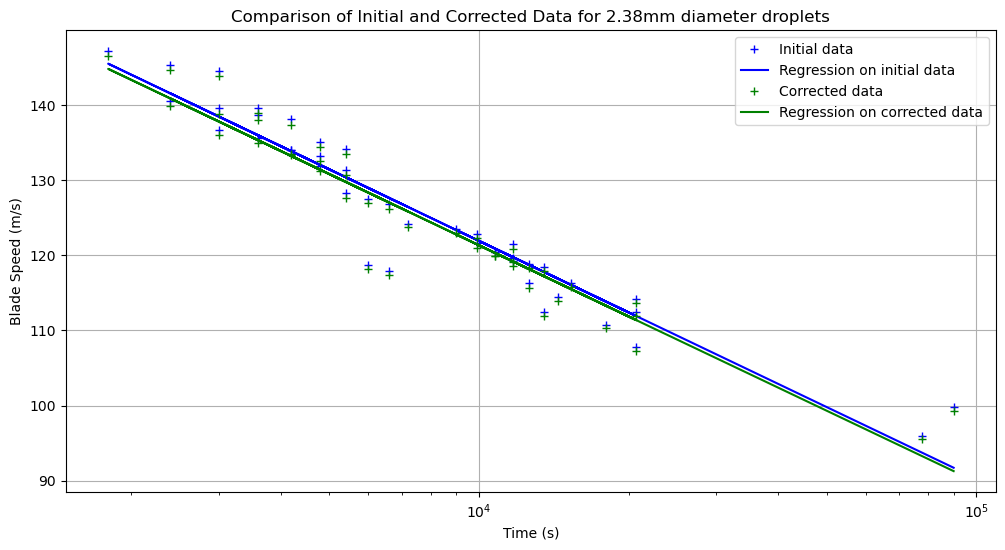

In [7]:
plt.figure(figsize=(12, 6))

# Plot initial data for 2.38mm data
plt.plot(x_data_238, y_data_238, '+', label='Initial data', color = 'blue')
plt.plot(x_data_238, slope_238*np.log(x_data_238) + intercept_238, color = 'blue', label='Regression on initial data')

# Plot corrected data for 2.38mm data
plt.plot(x_data_238, y_238_corrected, '+', label='Corrected data', color = 'green')
plt.plot(x_data_238, slope_238_corrected*np.log(x_data_238) + intercept_238_corrected, color = 'green', label='Regression on corrected data')

# Figure settings
plt.title('Comparison of Initial and Corrected Data for 2.38mm diameter droplets')
plt.xscale('log')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Blade Speed (m/s)')
plt.grid()
plt.show()
